In [4]:
%display latex
from sympy.physics.quantum.qubit import Qubit
from sympy.physics.quantum import Dagger
e0 = Qubit('0'); e1 = Qubit('1')
c = Dagger(e0)*e1; c
c.doit()
(Dagger(e1)*e1).doit()
(Dagger(e1)*e0).doit()

0

In [9]:
from sympy.physics.quantum import qapply
from sympy.physics.quantum.gate import H
[e0r, e1r] = [qapply(H(0)*ei
                    ) for ei in [e0, e1]] 
e0r, e1r

(sqrt(2)*|0>/2 + sqrt(2)*|1>/2, sqrt(2)*|0>/2 - sqrt(2)*|1>/2)

a1= (0.631836992876155, 1.34528368801383, 0)
a2= (0.631836992876155, -0.237403003767146, 0)
a3= (1.01093918860185, 1.10788068424668, 0.505469594300924)
b1= (0, 0, 0)
b2= (0.631836992876155, -0.237403003767146, 0)
b3= (1.01093918860185, 1.10788068424668, 0.505469594300924)
c1= (0, 0, 0)
c2= (0.631836992876155, 1.34528368801383, 0)
c3= (1.01093918860185, 1.10788068424668, 0.505469594300924)
d1= (0, 0, 0)
d2= (0.631836992876155, 1.34528368801383, 0)
d3= (0.631836992876155, -0.237403003767146, 0)


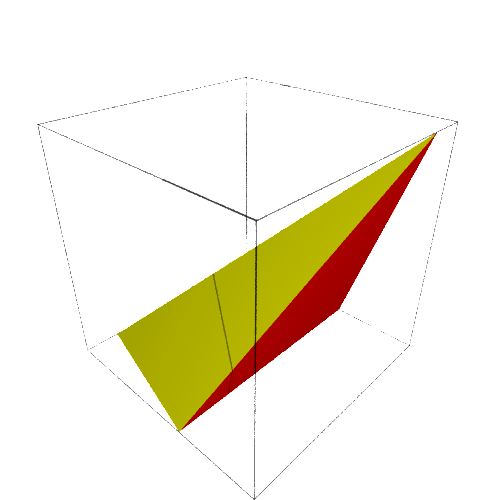

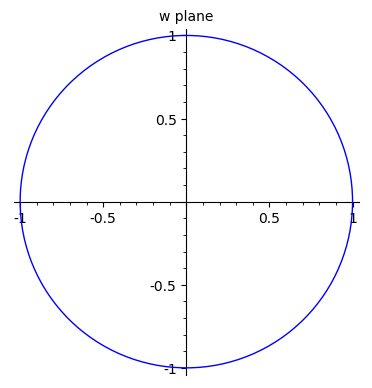

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 10 20:05:11 2014

@author: David Horgan
"""

from scipy.optimize import fsolve
import math



#scene.range = 10

#cylinder(pos=(0,0,0), radius=1.0,axis=(0,0,1), color=color.white)

#scene2 = display(title='Examples of Tetrahedrons',
    # x=0, y=0, width=600, height=600,
    # center=(0,0,0), background=(1,1,1))

#scene2.visible = True
#scene2.range = 10




#unit circle plot
C = circle((0,0), 1)





#input points from unit circle

p1=0.6
p2=0.7


#face1
a1=(((1 - p2**2)/(2*(1 + p1)))**(1/4), (1/2)*(p2 + 1)*((2*(1 + p1))/(1 - p2**2))**(1/4), 0)
a2=(((1 - p2**2)/(2*(1 + p1)))**(1/4),  (1/2)*(p2 - 1)*((2*(1 + p1))/(1 - p2**2))**(1/4), 0 )
a3=(((1/2)*( (1 + p1)**3)* (1 - p2**2))**(1/4),p2*((2*(1 + p1))/(1 - p2**2))**(1/4), sqrt(1 - p1**2)*((1 - p2**2)/(2*(1 + p1)))**(1/4) )
a=[a1,a2,a3]


#face2

b1=(0, 0, 0)
b2=(((1 - p2**2)/(2*(1 + p1)))**(1/4), (1/2)*(p2 - 1)*((2*(1 + p1))/(1 - p2**2))**(1/4), 0)
b3=(((1/2)*((1 + p1)**3)*(1 - p2**2))**(1/4),p2*((2*(1 + p1))/(1 - p2**2))**(1/4), sqrt(1-p1**2)*((1-p2**2)/(2*(1+p1)))**(1/4)  )
b=[b1,b2,b3]

#face3
c1=(0, 0, 0)
c2=( ((1 - p2**2)/(2*(1 + p1)))**(1/4), (1/2)*(p2 + 1)*((2*(1 + p1))/(1 - p2**2))**(1/4), 0)
c3=(((1/2)*((1 + p1)**3)*(1 - p2**2))**(1/4), p2*((2*(1 + p1))/(1 - p2**2))**(1/4),  sqrt(1 - p1**2)*((1 - p2**2)/(2*(1 + p1)))**(1/4) )
c=[c1,c2,c3]


#face4
d1=(0, 0, 0)
d2=(((1 - p2**2)/(2*(1 + p1)))**(1/4), (1/2)*(p2 + 1)*((2*(1 + p1))/(1 - p2**2))**(1/4), 0)
d3 =(((1 - p2**2)/(2*(1 + p1)))**(1/4), (1/2)*(p2 - 1)*((2*(1 + p1))/(1 - p2**2))**(1/4), 0)
d=[d1,d2,d3]

#printresults
print 'a1=', a1
print 'a2=', a2
print 'a3=', a3

print 'b1=', b1
print 'b2=', b2
print 'b3=', b3

print 'c1=', c1
print 'c2=', c2
print 'c3=', c3

print 'd1=', d1
print 'd2=', d2
print 'd3=', d3



G = Graphics()

#tetrahedron faces - coloured
P1=polygon([a1,a2, a3], color='red')
P2=polygon([b1,b2, b3],color='yellow')
P3=polygon([c1,c2, c3],color='blue')
P4=polygon([d1,d2, d3],color='green')

#polygon faces
#P1=polygon([a1,a2, a3])
#P2=polygon([b1,b2, b3])
#P3=polygon([c1,c2, c3])
#P4=polygon([d1,d2, d3])

#polygon([a1,a2, a3])
#polygon([b1,b2, b3])
#polygon([c1,c2, c3])
#polygon([d1,d2, d3])

g=G+P1+P2+P3+P4
show(g, title='tet(w)', viewer='tachyon')
show(C, title='w plane')

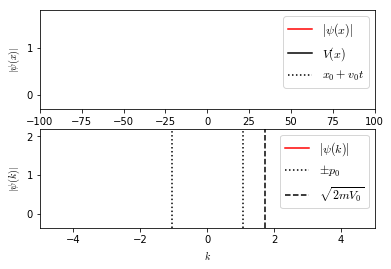

In [13]:
"""
General Numerical Solver for the 1D Time-Dependent Schrodinger's equation.

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
        """
        Parameters
        ----------
        x : array_like, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array_like, complex
            length-N array of the initial wave function at time t0
        V_x : array_like, float
             length-N array giving the potential at each x
        k0 : float
            the minimum value of k.  Note that, because of the workings of the
            fast fourier transform, the momentum wave-number will be defined
            in the range
              k0 < k < 2*pi / dx
            where dx = x[1]-x[0].  If you expect nonzero momentum outside this
            range, you must modify the inputs accordingly.  If not specified,
            k0 will be calculated such that the range is [-k0,k0]
        hbar : float
            value of planck's constant (default = 1)
        m : float
            particle mass (default = 1)
        t0 : float
            initial tile (default = 0)
        """
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        """
        Perform a series of time-steps via the time-dependent
        Schrodinger Equation.

        Parameters
        ----------
        dt : float
            the small time interval over which to integrate
        Nsteps : float, optional
            the number of intervals to compute.  The total change
            in time at the end of this method will be dt * Nsteps.
            default is N = 1
        """
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in xrange(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)


# uncomment the following line to save the video in mp4 format.  This
# requires either mencoder or ffmpeg to be installed on your system

#anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

pl.show()